#SparkCognition

###Libs:

In [1]:
!pip install pycaret[full]

     |████████████████████████████████| 266kB 5.4MB/s 
     |████████████████████████████████| 61kB 5.1MB/s 
     |████████████████████████████████| 1.4MB 10.0MB/s 
     |████████████████████████████████| 1.7MB 22.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.0MB 32.0MB/s 
     |████████████████████████████████| 276kB 27.7MB/s 
     |████████████████████████████████| 174kB 34.0MB/s 
     |████████████████████████████████| 256kB 27.0MB/s 
     |████████████████████████████████| 81kB 4.8MB/s 
     |████████████████████████████████| 6.8MB 31.7MB/s 
     |████████████████████████████████| 14.2MB 204kB/s 
     |████████████████████████████████| 112kB 36.5MB/s 
     |████████████████████████████████| 51.6MB 116kB/s 
     |████████████████████████████████| 307kB 40.2MB/s 
     |████████████████████████████████| 348kB 36.7MB

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


###Part 1: Data Preparation and Preprocessing:

In [3]:
#consolidated dataframe
df1=pd.read_csv("/content/DEMO_D.csv")
df2=pd.read_csv("/content/BPX_D.csv")
df3=pd.read_csv("/content/TCHOL_D.csv")


In [ ]:
df1.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEMN,RIDAGEEX,RIDAGEYR,RIDRETH1,DMDEDUC3,DMDEDUC2,DMDSCHOL
0,31127.0,4.0,2.0,1.0,11.0,12.0,5.397605e-79,3.0,NaN,NaN,NaN
1,31128.0,4.0,2.0,2.0,132.0,132.0,1.100000e+01,4.0,4.0,NaN,1.0
2,31129.0,4.0,2.0,1.0,189.0,190.0,1.500000e+01,4.0,10.0,NaN,1.0
3,31130.0,4.0,2.0,2.0,NaN,NaN,8.500000e+01,3.0,NaN,4.0,NaN
4,31131.0,4.0,2.0,2.0,535.0,536.0,4.400000e+01,4.0,NaN,4.0,NaN


In [ ]:
df2.head()

,SEQN,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPQ150A
0,31127.0,1.0,41.0,NaN,100.0,NaN
1,31128.0,1.0,401.0,NaN,NaN,2.0
2,31129.0,1.0,664.0,NaN,NaN,1.0
3,31130.0,2.0,NaN,4.0,NaN,2.0
4,31131.0,1.0,827.0,NaN,NaN,2.0


In [ ]:
df3.head()

,SEQN,LBXTC,LBDTCSI
0,31128.0,129.0,3.34
1,31129.0,170.0,4.40
2,31130.0,NaN,NaN
3,31131.0,105.0,2.72
4,31132.0,147.0,3.80


In [4]:
df_in=df1.merge(df2,on='SEQN',how='inner')

In [38]:
df=df_in.merge(df3,on='SEQN',how='inner')

In [23]:
df.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEMN,RIDAGEEX,RIDAGEYR,RIDRETH1,DMDEDUC3,DMDEDUC2,DMDSCHOL,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPQ150A,LBXTC,LBDTCSI
0,31128.0,4.0,2.0,2.0,132.0,132.0,11.0,4.0,4.0,NaN,1.0,1.0,401.0,NaN,NaN,2.0,129.0,3.34
1,31129.0,4.0,2.0,1.0,189.0,190.0,15.0,4.0,10.0,NaN,1.0,1.0,664.0,NaN,NaN,1.0,170.0,4.40
2,31130.0,4.0,2.0,2.0,NaN,NaN,85.0,3.0,NaN,4.0,NaN,2.0,NaN,4.0,NaN,2.0,NaN,NaN
3,31131.0,4.0,2.0,2.0,535.0,536.0,44.0,4.0,NaN,4.0,NaN,1.0,827.0,NaN,NaN,2.0,105.0,2.72
4,31132.0,4.0,2.0,1.0,842.0,843.0,70.0,3.0,NaN,5.0,NaN,1.0,730.0,NaN,NaN,2.0,147.0,3.80


In [6]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

def CalOutliers(df_num): 

    # calculating mean and std of the array
    data_mean, data_std = np.mean(df_num), np.std(df_num)

    # seting the cut line to both higher and lower values
    # You can change this value
    cut = data_std * 3

    #Calculating the higher and lower cut values
    # You can change this value
    cut = data_std * 3

    #Calculating the higher and lower cut values
    lower, upper = data_mean - cut, data_mean + cut

    # creating an array of lower, higher and total outlier values 
    outliers_lower = [x for x in df_num if x < lower]
    outliers_higher = [x for x in df_num if x > upper]
    outliers_total = [x for x in df_num if x < lower or x > upper]

    # array without outlier values
    outliers_removed = [x for x in df_num if x > lower and x < upper]
    
    print(color.BOLD+f'Lower outliers: {len(outliers_lower)}'+ color.END) # printing total number of values in lower cut of outliers
    print(color.BOLD+f'Upper outliers: {len(outliers_higher)}'+ color.END) # printing total number of values in higher cut of outliers
    print(color.BOLD+f'Total outliers: {len(outliers_total)}'+ color.END) # printing total number of values outliers of both sides
    print(color.BOLD+f'Non - outliers: {len(outliers_removed)}'+ color.END) # printing total number of non outlier values
    print(color.BOLD+f'% of Outliers : {round((len(outliers_total) / len(outliers_removed) )*100, 4)}'+ color.END ) # Percentage of outliers in points
    return outliers_removed

out=CalOutliers(df['RIDAGEMN'])

Lower outliers: 0
Upper outliers: 0
Total outliers: 0
Non - outliers: 7938
% of Outliers : 0.0


In [ ]:
np.mean(df['RIDAGEMN'])

400.23431594860165

In [39]:
df['RIDAGEYR']*12

0        132.0
1        180.0
2       1020.0
3        528.0
4        840.0
         ...  
8081     228.0
8082     144.0
8083     408.0
8084     252.0
8085     192.0
Name: RIDAGEYR, Length: 8086, dtype: float64

In [24]:
#since there are no outliers in the age at screening, we impute all the missing values with the mean of the age at screening in months and create a new column
df['AGE_AT_SCREENING']=df['RIDAGEMN'].fillna(np.mean(df['RIDAGEMN']))

In [40]:
#since we have the age in years for each of them, we can estimate the age at screening using the same 
df['AGE_AT_SCREENING2']=df['RIDAGEMN'].fillna(df['RIDAGEYR']*12)

In [41]:
df['AGE_AT_SCREENING2']

0        132.0
1        189.0
2       1020.0
3        535.0
4        842.0
         ...  
8081     235.0
8082     148.0
8083     410.0
8084     255.0
8085     200.0
Name: AGE_AT_SCREENING2, Length: 8086, dtype: float64

In [8]:
out=CalOutliers(df['RIDAGEEX'])

Lower outliers: 0
Upper outliers: 0
Total outliers: 0
Non - outliers: 7917
% of Outliers : 0.0


In [ ]:
df['AGE_AT_SCREENING2']

In [25]:
#same for the age at screening
df['AGE_AT_EXAM']=df['RIDAGEEX'].fillna(np.mean(df['RIDAGEEX']))

In [42]:
df['AGE_AT_EXAM']=df['RIDAGEEX'].fillna(df['AGE_AT_SCREENING2'])

In [43]:
df.drop(['RIDAGEMN','RIDAGEEX'],axis=1,inplace=True)

Comparing the age attributes and using two procedures to find the optimum imputation.


i. Imputing with the mean of the entire array. Less accurate.

ii. Using the age in years which has no missing values to impute the age at screening and age at exam to obtain a more close to original estimate for a better model prediction.

In [ ]:
np.max(df['DMDEDUC3']),np.min(df['DMDEDUC3'])

(99.0, 5.397605346934027e-79)

In [ ]:
np.max(df['DMDEDUC2']),np.min(df['DMDEDUC2'])

(9.0, 1.0)

In [45]:
#cleaning the two columns first by imputing nans with zero as it is better to assume that they have no educational background given Indian societal conditions
df['DMDEDUC2'].fillna(0,inplace=True)
df['DMDEDUC3'].fillna(0,inplace=True)

In [12]:
degree=['ELEMENTARY','HIGH SCHOOL','COLLEGE']

In [46]:
df['HIGHEST_EDUCATION']=df['DMDEDUC2']+df['DMDEDUC3']
#we add the net result and store it in a new column as the data is either 0 for one column and a certain number for the other as it has data for both children and adults now

In [ ]:
df[df['HIGHEST_EDUCATION']==12]

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC3,DMDEDUC2,DMDSCHOL,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPQ150A,LBXTC,LBDTCSI,AGE_AT_SCREENING,AGE_AT_EXAM,HIGHEST_EDUCATION
42,31177.0,4.0,2.0,2.0,18.0,4.0,12.0,0.0,1.0,1.0,476.0,NaN,NaN,2.0,NaN,NaN,219.0,219.0,12.0
201,31378.0,4.0,2.0,2.0,19.0,1.0,12.0,0.0,3.0,1.0,657.0,NaN,NaN,2.0,187.0,4.84,231.0,232.0,12.0
284,31492.0,4.0,2.0,2.0,19.0,2.0,12.0,0.0,3.0,1.0,562.0,NaN,NaN,2.0,143.0,3.70,232.0,233.0,12.0
657,31970.0,4.0,2.0,2.0,19.0,3.0,12.0,0.0,3.0,1.0,646.0,NaN,NaN,2.0,188.0,4.86,238.0,238.0,12.0
853,32219.0,4.0,2.0,1.0,19.0,1.0,12.0,0.0,3.0,1.0,643.0,NaN,NaN,2.0,NaN,NaN,238.0,239.0,12.0
1292,32796.0,4.0,2.0,2.0,18.0,5.0,12.0,0.0,1.0,1.0,862.0,NaN,NaN,2.0,163.0,4.22,220.0,221.0,12.0
1354,32878.0,4.0,2.0,1.0,17.0,1.0,12.0,0.0,1.0,1.0,677.0,NaN,NaN,1.0,181.0,4.68,210.0,212.0,12.0
1364,32890.0,4.0,2.0,1.0,18.0,3.0,12.0,0.0,1.0,1.0,15.0,NaN,NaN,2.0,218.0,5.64,221.0,222.0,12.0
1479,33034.0,4.0,2.0,2.0,18.0,3.0,12.0,0.0,3.0,1.0,16.0,NaN,NaN,2.0,194.0,5.02,226.0,227.0,12.0
1840,33504.0,4.0,2.0,2.0,17.0,1.0,12.0,0.0,3.0,1.0,615.0,NaN,NaN,1.0,149.0,3.85,210.0,211.0,12.0


In [47]:
#converting this to a categorical variable
df['HIGHEST_EDUCATION']=[0 if y < 13 else y for y in df['HIGHEST_EDUCATION']]
df['HIGHEST_EDUCATION']=[1 if  y>12 and y<16 else y for y in df['HIGHEST_EDUCATION']]
df['HIGHEST_EDUCATION']=[2 if  y>15 else y for y in df['HIGHEST_EDUCATION']]

In [48]:
df['HIGHEST_EDUCATION']=[degree[int(y)] for y in df['HIGHEST_EDUCATION']]

In [18]:
df['HIGHEST_EDUCATION']

0        ELEMENTARY
1        ELEMENTARY
2        ELEMENTARY
3        ELEMENTARY
4        ELEMENTARY
           ...     
8081    HIGH SCHOOL
8082     ELEMENTARY
8083     ELEMENTARY
8084     ELEMENTARY
8085     ELEMENTARY
Name: HIGHEST_EDUCATION, Length: 8086, dtype: object

1. Replacing all the null values in education with zero given the Indian background. Adding the two columns of education as they are mutually exclusive and independent and obtain the net number of eduactional years of each person.
2. Segregating all the people with different educational qualifactions into three encoded values 1,2,3 which is actually the index value of the qualifactions stored in the degree variable. 
Example: Elementary for total years of education being less than equal to 12, high school if between 12 to college ends which is 15 and rest all college as they are beyond 15.
3. Alloting the category according to the index assigned 


In [31]:
dfd=pd.read_csv("/content/DEMO_RETIRED.CSV")
dfd.head()

,SEQN,RETIRED
0,31127.0,NaN
1,31128.0,0.0
2,31129.0,0.0
3,31130.0,1.0
4,31131.0,0.0


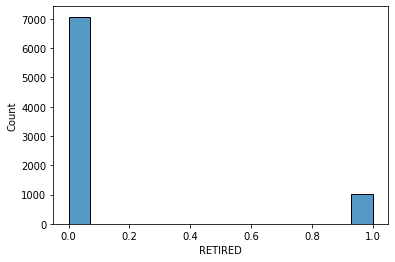

In [32]:
sns.histplot(data=dfd,x='RETIRED')

In [33]:
#checking the seqn which are present in the merged database as well
df[df.SEQN.isin(dfd['SEQN'])]

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC3,DMDEDUC2,DMDSCHOL,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPQ150A,LBXTC,LBDTCSI,AGE_AT_SCREENING,AGE_AT_EXAM,HIGHEST_EDUCATION
0,31128.0,4.0,2.0,2.0,11.0,4.0,4.0,0.0,1.0,1.0,401.0,NaN,NaN,2.0,129.0,3.34,132.000000,132.000000,ELEMENTARY
1,31129.0,4.0,2.0,1.0,15.0,4.0,10.0,0.0,1.0,1.0,664.0,NaN,NaN,1.0,170.0,4.40,189.000000,190.000000,ELEMENTARY
2,31130.0,4.0,2.0,2.0,85.0,3.0,0.0,4.0,NaN,2.0,NaN,4.0,NaN,2.0,NaN,NaN,400.234316,400.949476,ELEMENTARY
3,31131.0,4.0,2.0,2.0,44.0,4.0,0.0,4.0,NaN,1.0,827.0,NaN,NaN,2.0,105.0,2.72,535.000000,536.000000,ELEMENTARY
4,31132.0,4.0,2.0,1.0,70.0,3.0,0.0,5.0,NaN,1.0,730.0,NaN,NaN,2.0,147.0,3.80,842.000000,843.000000,ELEMENTARY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8081,41469.0,4.0,2.0,1.0,19.0,4.0,15.0,0.0,1.0,1.0,715.0,NaN,NaN,2.0,193.0,4.99,235.000000,235.000000,HIGH SCHOOL
8082,41471.0,4.0,2.0,1.0,12.0,4.0,5.0,0.0,1.0,1.0,703.0,NaN,NaN,2.0,142.0,3.67,148.000000,149.000000,ELEMENTARY
8083,41472.0,4.0,2.0,1.0,34.0,3.0,0.0,4.0,NaN,1.0,567.0,NaN,NaN,2.0,140.0,3.62,410.000000,411.000000,ELEMENTARY
8084,41473.0,4.0,2.0,1.0,21.0,1.0,0.0,2.0,NaN,1.0,645.0,NaN,NaN,2.0,184.0,4.76,255.000000,255.000000,ELEMENTARY


In [49]:
#storing age criteria in dummy dataframe
dummy_df=df[['SEQN','RIDAGEYR']]
df_new=dfd.merge(dummy_df,on='SEQN',how='inner')

In [50]:
df_new

,SEQN,RETIRED,RIDAGEYR
0,31128.0,0.0,11.0
1,31129.0,0.0,15.0
2,31130.0,1.0,85.0
3,31131.0,0.0,44.0
4,31132.0,1.0,70.0
...,...,...,...
8081,41469.0,0.0,19.0
8082,41471.0,0.0,12.0
8083,41472.0,0.0,34.0
8084,41473.0,0.0,21.0


In [52]:
#now imputation takes place using the age given
df_new['RETIRED_new']=[1 if y >60 else 0 for y in df_new['RIDAGEYR']]

In [53]:
dfd['RETIRED']=df_new['RETIRED'].fillna(df_new['RETIRED_new'],inplace=True)

Based on the age of the person at the time of screening, we estimates their present age and calculate if they are retired or not. If the age is above 60, then we assume they are retired and impute accordingly else we let it as it is.

##2. Model Building:

An auto-insurance company is revamping its pricing model. The analyst developing the new price model
believes that the best approach is to develop 2 models: one for customers who are likely to file an
insurance claim within the first year of their contract and another one for all other customers. The
analyst has prepared a clean dataset consisting of 10,000 customers and 10 engineered features which
capture driving behavior. The data has already been preprocessed for you (i.e., no missing data, no
outliers, data is scaled, no correlated features, and the classes are fairly balanced).
The data is contained in claim_prediction.csv , where CLAIM = 1 means the customer filed a claim in the
first year and CLAIM = 0 means the customer did not.
Develop a model to predict if customers will file a claim in their first year based on their driving
behavior.
In addition to submitting your code, use comments to explain the decisions you made and how well you
expect this model to perform on new data from a similar customer pool (and why).
Note that you are being evaluated on your model building and validation workflow, rather than on the
complexity of your solution.

In [54]:
df=pd.read_csv("/content/claim_prediction.csv")
df.head()

,EADDC,EAFXA,FDDBC,AFDDA,AXCXA,EXCCE,FBXFC,DFFEC,CEXAE,BBADX,CLAIM
0,-0.193513,0.021062,-0.870351,4.314903,-4.260162,-1.259531,0.175603,-0.942903,2.333260,4.678712,0
1,2.667844,-3.195978,2.718651,-0.885312,2.964261,2.161336,2.008505,-0.296360,-0.610780,-2.545978,1
2,2.280602,0.048539,-2.179863,-0.380866,-1.212960,2.097278,5.131315,-1.250050,2.362880,2.207307,0
3,0.592376,-1.590548,2.329976,-1.416489,1.743390,3.040990,2.371740,-0.190549,0.890761,-2.671923,0
4,1.236896,-0.656180,-0.381064,-2.332379,0.660684,2.055621,0.478162,-0.269513,2.614886,-3.655301,0


In [55]:
X=df.drop('CLAIM',axis=1)
y=df['CLAIM']

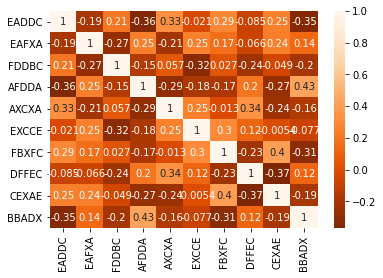

In [57]:
#checking the correlation between the different features
sns.heatmap(X.corr(),annot=True,cmap='Oranges_r')

In [59]:
import sklearn
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,train_size=0.7,random_state=2021)
Xtrain.shape,ytrain.shape

((7000, 10), (7000,))

In [60]:
#functions needed for classification
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,plot_roc_curve,accuracy_score
def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    if score_func:
        print("SCORE FUNC", score_func)
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)
    print("BEST", gs.best_params_, gs.best_score_)
    best = gs.best_estimator_
    return best
def do_classify(clf, parameters, Xtrain,Xtest,ytrain,ytest,score_func, n_folds=5, n_jobs=1):
    clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print("############# based on standard predict ################")
    print("Accuracy on training data: %0.2f" % (training_accuracy))
    print("Accuracy on test data:     %0.2f" % (test_accuracy))
    print(confusion_matrix(ytest, clf.predict(Xtest)))
    print("########################################################")
    plot_confusion_matrix(clf,Xtest,ytest)
    plot_roc_curve(clf,Xtest,ytest)
    return clf

In [62]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

SCORE FUNC roc_auc
BEST {'max_depth': 5, 'min_samples_leaf': 4, 'n_estimators': 180} 0.885210945663532
############# based on standard predict ################
Accuracy on training data: 0.86
Accuracy on test data:     0.84
[[1276  256]
 [ 236 1232]]
########################################################


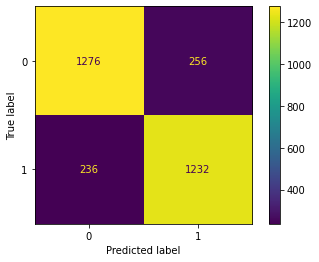

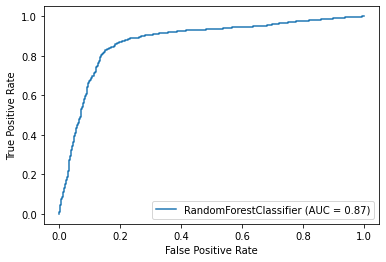

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=2021)
params={'max_depth':range(3,6),'min_samples_leaf':range(3,5),'n_estimators':range(100,200,20)}
clf=do_classify(rf,params,Xtrain,Xtest,ytrain,ytest,'roc_auc')

A RandomForest Classifier along with Grid Search cross validation and optimized parameters is built to build the model which would predict whether the customer would file an insurance claim within a year or not and it gives us a 84% accuracy on the test data and seems perfectly fitted with a good bias-variance tradeoff.
The roc-auc curve also predicts it to have the false positive rate under control with a aoc score of 87%.

##3. Model Evaluation:

1.What is one way to determine the number of clusters in K-Means clustering? How would you estimate the efficacy, or quality, of the K-means clustering results?
Answer: One way to determine the number of clusters in K-Means Clustering is using the Elbow curve where we keep increasing the number of clusters for a particular dataset and see that the distance between the centre of the cluster and the cluster data keeps decreasing, starting at a breaking point call the elbow and then after sometime, the drop down stabilises as the distance doesn't get better. 
The efficacy or quality of the Kmeans clustering can be optimized or examined by checking the distance of the cluster data from the cluster centre for each of the cluster, which shows how well is the data being distinguished from one another.

2.Your linear regression model is suffering from low bias and high variance. What steps can you take to improve your model?
Answer: Since there is low bias and high variance, it means that our model has overfitted. In such a case, we reduce the number of features by optimally reducing the more correlated ones or the ones which don't have much to do with the predictions.

We can also use model selection algorithms which help us evaluate our models systematically for example train test split which keeps certain data as test data that can be used to check whether the model is overfitting or not.

We need to make sure that the test data and train data prediction accuracy difference is not huge as it means that our model is far from optimum results.

Feeding more data is always a good option as it leads to less overfitting and more generalisation of the model by giving it a better understanding of the population.

3.In the choice of model, I would either choose the 1st or the 4th model. This is because, we do not want a huge difference between the training and validation error and obtain an optimum bias-variance tradeoff model. The high training error means underfit and anomalous low validation error means overfitting on the testing data or leakage of data somehow. Hence, the 1st and the 4th models which are comparatively low error ones with less TE and VE difference would be optimum ones.

######4.

In [65]:
#calculation of recall, precision and f1 97,48,6,112
tn=97
fp=97
fn=6
tp=112
precision=tp/(tp+fp)
recall=tp/(tp+fn)
f1=2*precision*recall/(precision+recall)
print("Recall :",recall)
print("Precision:",precision)
print("F1 score:",f1)

Recall : 0.9491525423728814
Precision: 0.5358851674641149
F1 score: 0.6850152905198776


a.Completed above.

b.When predicting for cancer patients, we prefer false positives in classification than false negatives as it is better to ask a healthy person to have a chemo or cancer test than mispredict a patient of not having cancer and letting them die. In such cases, Binary cross entropy is the evaluation metric which tries to minimize the log likelihood of the error and reduce the cost of each misprediction where here the cost maybe someone's lives!

c.If your classifier model is attempting to determine whether or not to recommend a YouTube video. Which type of error should you focus on for this type of problem?

Answer: Since in recommendation using collaborative filtering and reinforcement learning, the watchtime is taken into consideration, multiclass classification based on the watch time is carried out using the weighted logistic regression. 
The error evaluation we then cocentrate on is using the confusion matrix, we ensure that the f1 score is high, accuracy is optimum and eventually precision and recall is optimum too with not much differences. Cross entropy can also be used in these cases as well.
 I would choose the accuracy score as the accuracy of recommendations based on the watch time would tell us the ranking of the recommended videos and whether the model should be rewarded or not for particular recommendation.

##Exercise 4: Anomaly Detection
Please complete the following exercise in the same file as the other exercises, using comments in your
code to explain your reasoning.
An oil and gas company with several offshore platforms is experimenting with anomaly detection on one of its platforms. An analyst has provided you with sample data for the pilot platform ( anomaly_detection.csv ). The data is a time series dataset, consisting of average daily readings from 5 sensors between 01/01/2016 and 12/30/2016. You can assume that data preprocessing (filling missing values, scaling, etc) has been handled by the analyst. You can also assume that the daily readings are
independent and identically distributed.The analyst has reviewed operation notes for the first 9 months (01/01/2016 to 09/30/2016) and
identified that there were issues on the platform between 02/14/2016 and 02/21/2016. The analyst did not have time to review the final 3 months of data.Use the first 9 months of data (01/01/2016 to 09/30/2016) to develop an anomaly detection model and test it on the final 3 months of data (10/01/2016 to 12/30/2016). How many anomalous periods were identified in the test period between 10/01/2016 and 12/30/2016? Only report anomalies that last longer than 2 days. Additionally, if an anomaly lasts for longer than 14 days, we consider that behavior
to be the new normal, and we do not report it.
Hint: There are multiple potential approaches to solving this problem. One acceptable solution to this problem is to train a PCA model on normal data. Given new data, risk can be computed as the difference
between the input data and reconstructed data, where reconstructed data is the result of compressing and decompressing the input data using PCA.

In [66]:
df=pd.read_csv("/content/anomaly_detection.csv")

In [67]:
df.head()

,CEACC,CCDEF,FAXAE,FBFFD,EDDAB
0,0.000000,0.000000,3.000000,3.000000,8.000000
1,1.232260,-0.217305,3.193780,3.489992,7.792553
2,2.540129,0.606709,3.180950,3.464811,7.817440
3,5.520271,1.470812,3.330528,2.968375,7.409152
4,5.914298,2.745060,3.061706,3.440980,7.153049


In [68]:
# init setup
from pycaret.anomaly import *
s = setup(df, session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(365, 5)"
2,Missing Values,False
3,Numeric Features,5
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(365, 5)"
9,CPU Jobs,-1


In [69]:
# train model
pca = create_model('pca', fraction = 0.1)
pca_results = assign_model(pca)
pca_results.head()

,CEACC,CCDEF,FAXAE,FBFFD,EDDAB,Anomaly,Anomaly_Score
0,0.000000,0.000000,3.000000,3.000000,8.000000,1,251.236220
1,1.232260,-0.217305,3.193780,3.489992,7.792553,1,243.504888
2,2.540129,0.606709,3.180950,3.464811,7.817440,0,223.864219
3,5.520271,1.470812,3.330528,2.968375,7.409152,0,227.359302
4,5.914298,2.745060,3.061706,3.440980,7.153049,0,203.907198


In [70]:
pca_results[pca_results['Anomaly'] == 1].head()#the anomalies predicted are as follows 

,CEACC,CCDEF,FAXAE,FBFFD,EDDAB,Anomaly,Anomaly_Score
0,0.000000,0.000000,3.000000,3.000000,8.000000,1,251.236220
1,1.232260,-0.217305,3.193780,3.489992,7.792553,1,243.504888
44,4.043725,-1.219565,0.905195,2.288989,7.709211,1,255.023049
45,4.576282,-1.492071,0.899782,2.130575,7.968487,1,258.810210
48,4.480263,-1.545013,-0.934196,2.485914,8.099992,1,249.862577


Since the dates are not provided, due to inadequate information, we cannot calulate the total number of days certain anomalies have occured and if it is the new normal or not. However, based on the pca model, we obtain the anomaly occurences and the anomaly_score, which can be added over a period of time of 30 day intervals to calculate the net number of days anomaly has occured in the oil and gas company.